# Basic Exploration
As of this notebook, I've only pulled pages 1-100, which gives me around 10,000 books.  This notebook will browse through this data briefly just to get an idea about what we're dealing with.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
books = pd.read_csv('./scraper/output/pages-1-100.tsv', sep='\t')

Just as a reminder, here are the columns with the top two rows for example:

* `title` - The title of the book in the language of this particular edition.
* `original_title` - The title in the original language (this is usually the same as `title`).
* `series` - The name of the series the book belongs to, if any.
* `authors` - A comma separated list of the contributing authors.  Roles are sometimes listed in (brackets) after their name.
* `avg_rating` - The average rating out of 5 that the book has across all ratings.
* `num_ratings` - How many times was the book rated (by which `avg_rating` was calculated from).
* `num_reviews` - How many times was the book reviewed?
* `genres` - A comma separated list of the top genres listed on this book's page.
* `description` - The description of the book on the book's page, similar to the blurb.

In [3]:
books.head(2)

,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url
0,The Canterbury Tales,Tales of Caunterbury,NaN,English,"Geoffrey Chaucer,Nevill Coghill (Translator)",3.49,176459,3099,"Classics,Fiction,Poetry,Literature,Academic,Sc...",The procession that crosses Chaucer's pages is...,https://www.goodreads.com/book/show/2696.The_C...
1,The Things They Carried,The Things They Carried,NaN,English,Tim O'Brien,4.13,233187,13213,"Fiction,Historical,Historical Fiction,War,Clas...","In 1979, Tim O'Brien's Going After Cacciato —a...",https://www.goodreads.com/book/show/133518.The...


## Missing values
There are some columns that *should* have missing values.  The `original_title` is not always available.  Books are not always part of a `series`.  The `language` isn't always specified.  Ideally, every other field should be present, but it cannot always be guaranteed.  However, `title` should always exist and be valid, as should its `url`.

Looking below, `series` is missing the most, which is fine.  I cannot guarantee that books that have no `series` are not actually in a series - that's up to the editors to add on the website.  `original_title`, as mentioned above, is not always present in the book's metadata.  The `language` being missing from some books is a shame, but it's not always listed either.  `genres` and `description` warrant further investigation, as ideally these should be present.

In [4]:
books.isnull().sum().sort_values(ascending=False)

series            4717
original_title     992
language           268
genres              93
description         69
url                  0
num_reviews          0
num_ratings          0
avg_rating           0
authors              0
title                0
dtype: int64

### Missing genres
Looking at the top two missing genres (by opening the URL in a browser), the genres are just plain missing.  As mentioned earlier, some elements we'd like to have present always are omitted from the page.  Unfortunate, but there's not much we can do other than find the genres manually!

In [5]:
books[books.genres.isnull()].head(2).url.values

array(['https://www.goodreads.com/book/show/43524300-take-my-heart',
       'https://www.goodreads.com/book/show/44416211-the-candidate-and-other-stories'],
      dtype=object)

### Missing description
Again, eyeballing the top two missing descriptions, it seems that they are also missing from the page entirely.  Shame!

In [6]:
books[books.description.isnull()].head(2).url.values

array(['https://www.goodreads.com/book/show/30474.The_Communist_Manifesto',
       'https://www.goodreads.com/book/show/80176.Winesburg_Ohio'],
      dtype=object)

## Genres
Let's have a look at which genres exist and how many books are in each category.  Looking at the unique tags (i.e., printing out the index of `split_genres_counts`) shows some questionable categories for what I'd consider a genre.  I think these should be instead referred to as user tags rather than genres.  Unfortunately, when working with user data, problems like this rise.

Looking at the graphs below, we can see that fantasy, fiction, romance, young adult, and historical are the most popular genres.  On the other hand, cycling, earth, quantum mechanics (boo!), social work, and urban planning are the least popular.

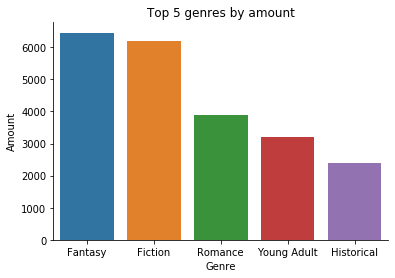

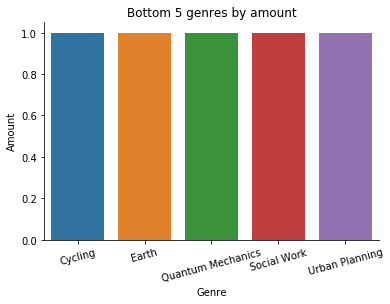

In [77]:
# Split all strings and manipulate so that we have an index per row repeated as many times as there is genres for that entry.
split_genres = books.loc[books.genres.notnull(), 'genres'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)
# Count how many entries exist per category and sort them.
split_genres_counts = split_genres.value_counts().sort_values(ascending=False)

# Plot the top 5.
sns.barplot(y=split_genres_counts[:5], x=split_genres_counts.index[:5])
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Top 5 genres by amount')
plt.show()

# And the bottom 5.
g = sns.barplot(y=split_genres_counts[-5:], x=split_genres_counts.index[-5:])
g.set_xticklabels(g.get_xticklabels(), rotation=15, ha='center')
sns.despine()
plt.xlabel('Genre')
plt.ylabel('Amount')
plt.title('Bottom 5 genres by amount')
plt.show()

## Authors
TODO: Split authors as above, find most popular author.

## Series
TODO: Find series with the most entries.